Starting VIKOR Method...


----------------------------------------
Normalization of Column 1:
  - Max value: 11
  - Min value: 5
  - Normalized values: [0.5        0.         0.33333333 0.66666667 1.         0.16666667]
----------------------------------------

----------------------------------------
Normalization of Column 2:
  - Max value: 10
  - Min value: 3
  - Normalized values: [0.57142857 0.         0.28571429 0.85714286 1.         0.85714286]
----------------------------------------

----------------------------------------
Normalization of Column 3:
  - Max value: 7
  - Min value: 2
  - Normalized values: [0.  1.  0.8 1.  0.2 0.6]
----------------------------------------

----------------------------------------
Normalization of Column 4:
  - Max value: 7
  - Min value: 1
  - Normalized values: [0.         0.66666667 0.5        0.33333333 1.         0.5       ]
----------------------------------------

----------------------------------------
Ideal and Negative Ideal Solutio

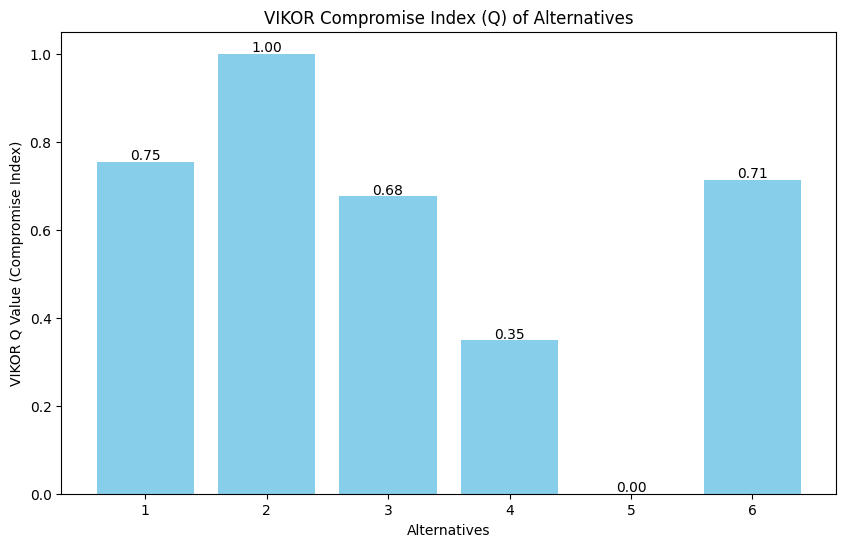

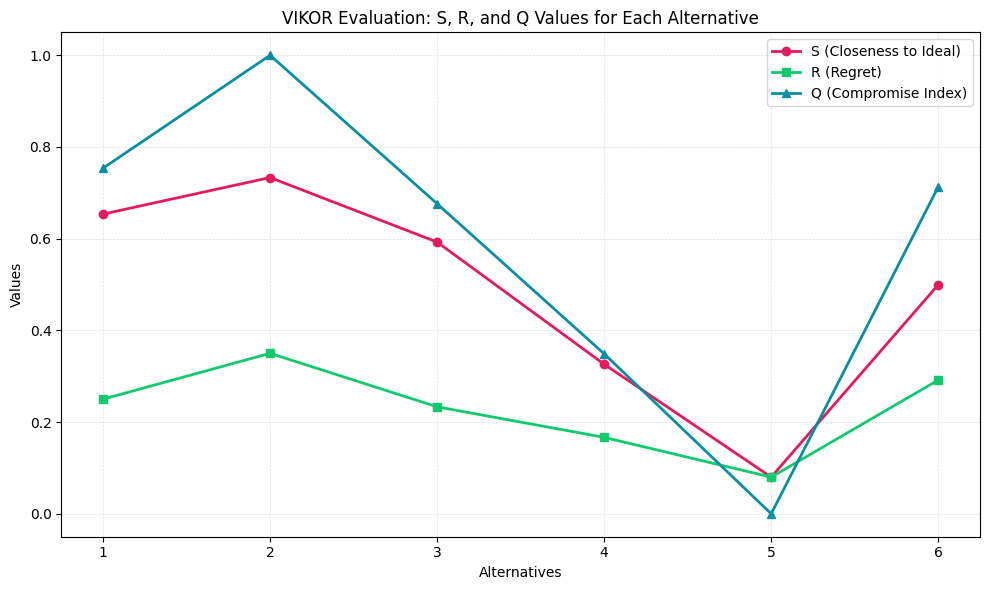

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_matrix(decision_matrix, verbose=False):
    """
    Normalize the decision matrix using linear normalization technique.
    Each value in the matrix is normalized to a range between 0 and 1.

    Args:
        decision_matrix (numpy array): Matrix of alternatives and criteria.
        verbose (bool): If True, prints detailed steps for debugging.

    Returns:
        numpy array: Normalized decision matrix.
    """
    num_alternatives, num_criteria = decision_matrix.shape
    normalized_matrix = np.zeros_like(decision_matrix, dtype=float)

    # Normalize each column (criterion)
    for j in range(num_criteria):
        col_max = np.max(decision_matrix[:, j])  # Find the maximum value for the column
        col_min = np.min(decision_matrix[:, j])  # Find the minimum value for the column
        normalized_matrix[:, j] = (decision_matrix[:, j] - col_min) / (col_max - col_min)

        # Verbose output to understand normalization
        if verbose:
            print(f"\n{'-'*40}")
            print(f"Normalization of Column {j + 1}:")
            print(f"  - Max value: {col_max}")
            print(f"  - Min value: {col_min}")
            print(f"  - Normalized values: {normalized_matrix[:, j]}")
            print(f"{'-'*40}")

    return normalized_matrix


def calculate_ideal_solutions(normalized_matrix, verbose=False):
    """
    Calculate the ideal and negative ideal solutions for each criterion.

    The ideal solution is the maximum value for each criterion (best solution),
    and the negative ideal solution is the minimum value for each criterion (worst solution).

    Args:
        normalized_matrix (numpy array): The normalized decision matrix.
        verbose (bool): If True, prints detailed steps for debugging.

    Returns:
        tuple: Ideal and negative ideal solutions.
    """
    # Ideal solution (maximum value per criterion)
    ideal_solution = np.max(normalized_matrix, axis=0)
    # Negative ideal solution (minimum value per criterion)
    negative_ideal_solution = np.min(normalized_matrix, axis=0)

    # Verbose output to understand ideal and negative ideal solutions
    if verbose:
        print("\n" + "-"*40)
        print("Ideal and Negative Ideal Solutions:")
        print(f"  - Ideal Solution (Best values): {ideal_solution}")
        print(f"  - Negative Ideal Solution (Worst values): {negative_ideal_solution}")
        print("-"*40)

    return ideal_solution, negative_ideal_solution


def calculate_S_R(normalized_matrix, weights, ideal_solution, negative_ideal_solution, verbose=False):
    """
    Calculate the closeness to the ideal solution (S) and the regret (R) for each alternative.

    The S value is the sum of the weighted differences from the ideal solution,
    and the R value is the maximum weighted difference.

    Args:
        normalized_matrix (numpy array): The normalized decision matrix.
        weights (numpy array): The weights assigned to each criterion.
        ideal_solution (numpy array): The ideal (best) solution for each criterion.
        negative_ideal_solution (numpy array): The negative ideal (worst) solution for each criterion.
        verbose (bool): If True, prints detailed steps for debugging.

    Returns:
        tuple: The S (closeness to ideal) and R (regret) values for each alternative.
    """
    num_alternatives = normalized_matrix.shape[0]
    S = np.zeros(num_alternatives)  # S value array
    R = np.zeros(num_alternatives)  # R value array

    for i in range(num_alternatives):
        # S is the sum of the weighted distances from the ideal solution
        S[i] = np.sum(weights * (ideal_solution - normalized_matrix[i, :]))
        # R is the maximum of the weighted distances from the ideal solution
        R[i] = np.max(weights * (ideal_solution - normalized_matrix[i, :]))

        # Verbose output to understand S and R calculations for each alternative
        if verbose:
            print(f"\n{'-'*40}")
            print(f"Alternative {i + 1}:")
            print(f"  - S[{i + 1}] (Closeness to Ideal): {S[i]}")
            print(f"  - R[{i + 1}] (Regret): {R[i]}")
            print(f"{'-'*40}")

    return S, R


def calculate_Q(S, R, v=0.5, verbose=False):
    """
    Calculate the VIKOR compromise index (Q) for each alternative.
    This index is based on the S (closeness to ideal) and R (regret) values.

    The Q index combines the S and R values using a weight parameter v,
    where v determines the relative importance of the closeness to the ideal (S) versus regret (R).

    Args:
        S (numpy array): Closeness to the ideal solution.
        R (numpy array): Regret values.
        v (float): A weight that reflects the relative importance of S and R (0 <= v <= 1).
        verbose (bool): If True, prints detailed steps for debugging.

    Returns:
        numpy array: The Q values (compromise index) for each alternative.
    """
    S_min, S_max = np.min(S), np.max(S)  # Min and max values of S
    R_min, R_max = np.min(R), np.max(R)  # Min and max values of R

    Q = np.zeros_like(S)  # Initialize the Q array

    for i in range(len(S)):
        # Calculate Q value for each alternative
        Q[i] = v * (S[i] - S_min) / (S_max - S_min) + (1 - v) * (R[i] - R_min) / (R_max - R_min)

        # Verbose output to understand the calculation of Q for each alternative
        if verbose:
            print(f"\n{'-'*40}")
            print(f"Calculating Q for Alternative {i + 1}:")
            print(f"  - Q[{i + 1}] = {Q[i]}")
            print(f"{'-'*40}")

    return Q


def rank_alternatives(S, R, Q):
    """
    Rank the alternatives based on the values of S (closeness to ideal),
    R (regret), and Q (compromise index). The rankings are determined in ascending order
    since smaller values are better for S, R, and Q.

    Args:
        S (numpy array): Closeness to the ideal solution.
        R (numpy array): Regret values.
        Q (numpy array): The compromise index values.
        verbose (bool): If True, prints detailed steps for debugging.

    Returns:
        tuple: Rankings based on S, R, and Q values.
    """
    # Rank the alternatives by ascending order of S, R, and Q (smallest values are best)
    S_rank = np.argsort(S) + 1  # Best is smallest S
    R_rank = np.argsort(R) + 1  # Best is smallest R
    Q_rank = np.argsort(Q) + 1  # Best is smallest Q

    return S_rank, R_rank, Q_rank


def plot_vikor_results(Q_values):
    """
    Plot the VIKOR Q values (compromise index) for each alternative as a bar chart.

    Args:
        Q_values (numpy array): The Q values for each alternative.
    """
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(1, len(Q_values) + 1), Q_values, color='skyblue')

    # Add numbers inside the bars near the top
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.03, f'{height:.2f}',
                 ha='center', va='top', fontsize=10, color='black')

    plt.xlabel('Alternatives')
    plt.ylabel('VIKOR Q Value (Compromise Index)')
    plt.title('VIKOR Compromise Index (Q) of Alternatives')
    plt.xticks(range(1, len(Q_values) + 1))
    plt.show()


def plot_srq_line(S, R, Q):
    """
    Plot the S, R, and Q values for each alternative as line plots.

    Args:
        S (numpy array): Closeness to the ideal solution.
        R (numpy array): Regret values.
        Q (numpy array): The compromise index values.
    """
    alternatives = np.arange(1, len(S) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(alternatives, S, marker='o', label='S (Closeness to Ideal)', color='#e51a5e', linestyle='-', linewidth=2)
    plt.plot(alternatives, R, marker='s', label='R (Regret)', color='#12ca6e', linestyle='-', linewidth=2)
    plt.plot(alternatives, Q, marker='^', label='Q (Compromise Index)', color='#098fa4', linestyle='-', linewidth=2)

    plt.xlabel('Alternatives')
    plt.ylabel('Values')
    plt.title('VIKOR Evaluation: S, R, and Q Values for Each Alternative')

    plt.legend()
    plt.tight_layout()
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()


def vikor(decision_matrix, weights, v=0.5, plot=True, verbose=False):
    """
    Implement the VIKOR method for multi-criteria decision-making. It provides rankings
    based on the closeness to ideal solution (S), regret (R), and compromise index (Q).

    Args:
        decision_matrix (list or numpy array): The decision matrix containing alternatives
                                                 and their respective criterion values.
        weights (list or numpy array): Weights for each criterion.
        v (float): The weight that reflects the relative importance of S and R (0 <= v <= 1).
        plot (bool): If True, generates plots for the VIKOR results.
        verbose (bool): If True, prints detailed steps for debugging.

    Returns:
        None
    """
    decision_matrix = np.array(decision_matrix)
    weights = np.array(weights)

    # Verbose output indicating the start of the VIKOR method
    if verbose:
        print("Starting VIKOR Method...\n")

    # Step 1: Normalize the decision matrix
    normalized_matrix = normalize_matrix(decision_matrix, verbose)

    # Step 2: Calculate ideal and negative ideal solutions
    ideal_solution, negative_ideal_solution = calculate_ideal_solutions(normalized_matrix, verbose)

    # Step 3: Calculate S (closeness to ideal) and R (regret)
    S, R = calculate_S_R(normalized_matrix, weights, ideal_solution, negative_ideal_solution, verbose)

    # Step 4: Calculate Q (compromise index)
    Q = calculate_Q(S, R, v, verbose)

    # Step 5: Rank alternatives
    S_rank, R_rank, Q_rank = rank_alternatives(S, R, Q)

    # Final Results
    print("\n" + "="*40)
    print("\n*VIKOR Results:*")
    print("\nS values (Closeness to Ideal):", S)
    print("\nR values (Regret):", R)
    print("\nQ values (Compromise Index):", Q)
    print()
    print("\nRanking Based on Q (Compromise Index):", Q_rank)
    print("\nRanking Based on S (Closeness to Ideal):", S_rank)
    print("\nRanking Based on R (Regret):", R_rank)
    print()
    print("="*40)
    print()

    # Plot results if required
    if plot:
        plot_vikor_results(Q)
        plot_srq_line(S, R, Q)


# Example Usage:

# Decision matrix with 6 alternatives and 4 criteria
decision_matrix = [[8, 7, 2, 1],
                   [5, 3, 7, 5],
                   [7, 5, 6, 4],
                   [9, 9, 7, 3],
                   [11, 10, 3, 7],
                   [6, 9, 5, 4]]

# Normalized weights for the 4 criteria
weights = [0.35, 0.3, 0.1, 0.25]  # Criteria weights, normalized to sum to 1

# Run VIKOR with verbose output
vikor(decision_matrix, weights, v=0.5, plot=True, verbose=True)